In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


data_train = pd.read_csv('/Users/ilyanovikov/Desktop/Доп_обучение/titanic/train.csv')

data_1 = data_train.drop(['Name','Ticket','PassengerId'],axis = 1) # выкинул имя,номер билета и id пассажира, 
#в них не может содержаться закономерность, иначе мистика
data_1.isna().sum() # проверил, где есть пропущенные значения, больше всего их в колонке Cabin
data_2 = data_1.drop('Cabin',axis = 1) #выбросил колонку Cabin
data_3 = pd.get_dummies(data_2) #тк библиотеки для DS не умеют работать с текстом, разбил номинативные
#переменные на dummy_values
data_4 = data_3.fillna(data_3.Age.median())# заполнил пропуски в колонке Age медианным значением
data_4.isna().sum()

# У нас есть явная коллинеарность между Sex_female и Sex_male, а также между Embarked
# Я бы, наверное, выкинул что-то, потестим
data_5 = data_4.drop(['Sex_male','Embarked_C'],axis = 1)
print(data_5.head())

# Создаем обучающую выборку
X_train = data_5.drop(['Survived'],axis = 1)
Y_train = data_5.Survived


# КОНЕЦ ПРЕДОБРАБОТКИ

# Строим модельки, пока только обучаем, смотрим на точность обучения:

# Логистическая регрессия
clf = LogisticRegressionCV(random_state = 0, cv = 5, max_iter = 500)
clf.fit(X_train,Y_train)
print('Logit:',clf.score(X_train,Y_train),'\n')

# Дерево решений
tr_clf = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
params = {'max_depth':range(4,30,2),'min_samples_split':range(4,20,2),'min_samples_leaf':range(1,10,2)}
search = GridSearchCV(tr_clf,params,cv = 5)
search.fit(X_train,Y_train)
tree_params = search.best_params_
print('best_tree_params:',tree_params)
opt_clf = search.best_estimator_
print('Tree:',opt_clf.score(X_train,Y_train),'\n')

# Random Forest

rf_clf = RandomForestClassifier(random_state = 0)
par = {'n_estimators':range(6,24,2),'max_depth':range(4,30,2),'min_samples_split':range(4,20,2),'min_samples_leaf':range(1,10,2)}
rf_sch = GridSearchCV(rf_clf,par,cv = 4,n_jobs=-1)
rf_sch.fit(X_train,Y_train)
rf_params = rf_sch.best_params_
print('best_rf_params:',rf_params)
opt_rf_clf = rf_sch.best_estimator_
print('Random Forest:', opt_rf_clf.score(X_train,Y_train))

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Embarked_Q  \
0         0       3  22.0      1      0   7.2500           0           0   
1         1       1  38.0      1      0  71.2833           1           0   
2         1       3  26.0      0      0   7.9250           1           0   
3         1       1  35.0      1      0  53.1000           1           0   
4         0       3  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  
Logit: 0.8013468013468014 

best_tree_params: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 16}
Tree: 0.8664421997755332 

best_rf_params: {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 18}
Random Forest: 0.9135802469135802


In [2]:
data_test = pd.read_csv('/Users/ilyanovikov/Desktop/Доп_Обучение/titanic/test.csv')

test_1 = data_test.drop(['Name','Ticket','PassengerId','Cabin'],axis = 1) 
test_2 = pd.get_dummies(test_1)
test_3 = test_2.fillna(test_2.Age.median())# заполнил пропуски в колонке Age медианным значением
test_4 = test_3.drop(['Sex_male','Embarked_C'],axis = 1)

X_test = test_4

L_pred = clf.predict(X_test)
Logit_pred = pd.DataFrame({'PassengerId':data_test.PassengerId,'Survived':L_pred}).set_index('PassengerId')
Logit_pred.to_csv('/Users/ilyanovikov/Desktop/Logit_pred.csv')

Tree_pred = opt_clf.predict(X_test)
Tree_pred_df = pd.DataFrame({'PassengerId':data_test.PassengerId,'Survived':Tree_pred}).set_index('PassengerId')
Tree_pred_df.to_csv('/Users/ilyanovikov/Desktop/Tree_pred.csv')

R_pred = opt_rf_clf.predict(X_test)
R_pred_df = pd.DataFrame({'PassengerId':data_test.PassengerId,'Survived':R_pred}).set_index('PassengerId')
R_pred_df.to_csv('/Users/ilyanovikov/Desktop/RF_pred.csv')



In [3]:
tree_feat_imp = opt_clf.feature_importances_
tree_imp = pd.DataFrame({'name':list(X_train),'importance':tree_feat_imp})
tree_imp.sort_values(by = 'importance')

,name,importance
6,Embarked_Q,0.000000
7,Embarked_S,0.020234
3,Parch,0.020569
2,SibSp,0.020847
0,Pclass,0.135262
1,Age,0.188560
4,Fare,0.203614
5,Sex_female,0.410915


In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

data_train = pd.read_csv('/Users/ilyanovikov/Desktop/Доп_обучение/titanic/train.csv')

data_1 = data_train.drop(['Name','Ticket','PassengerId'],axis = 1) 
data_1.isna().sum()
data_2 = data_1.drop('Cabin',axis = 1) 
data_3 = pd.get_dummies(data_2) 
data_4 = data_3.fillna(data_3.Age.median())

data_5 = data_4.drop(['Sex_male','Embarked_C'],axis = 1)

log_reg_Logit = LogisticRegression('Survived ~ Sex',data = data_5).fit()

TypeError: __init__() got an unexpected keyword argument 'data'

In [5]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split

X = data_5.drop(['Survived'],axis = 1)
Y = data_5.Survived


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=50)
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train1 = scaler.transform(X_train)
#X_test1 = scaler.transform(X_test)

nn = MLPClassifier(solver ='adam', alpha = 0, max_iter = 1000)

nn.fit(X_train, y_train)
pred = nn.predict(X_test)
roc_auc_score(y_test, pred)


#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

0.7861683683298016

In [6]:
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt

Data = pd.read_csv('/Users/ilyanovikov/Desktop/Доп_обучение/Test_DS/titanic.csv', header = 0, sep = ',')


import statsmodels.formula.api as smf

### с помощью модели GLM 
### ОБЯЗАТЕЛЬНО указывать, что Family - Binomial, иначе результат будет неверным
log_reg = smf.glm('Survived ~ Sex',data = Data,family = sm.families.Binomial()).fit()

### с помощью модели Logit
log_reg_Logit = smf.logit('Survived ~ Sex',data = Data).fit()

print(log_reg.summary(),'\n')
print(log_reg_Logit.summary())



Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5
                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Tue, 07 Mar 2023   Deviance:                       917.80
Time:                        02:18:30   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------

## ---------------------------------------------------------------------------------------------------

Повспоминаем модели и потренируемся на iris-e

In [7]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

data = load_iris()
features = data.data
classes = data.target

features_pd_test = pd.DataFrame({'sepal_length':features[:,0],'sepal_width':features[:,1],'petal_length':features[:,2],'petal_width':features[:,3]})
features_main = features_pd_test.drop(['sepal_length','sepal_width'], axis = 1)
features_main
classes_pd = pd.DataFrame({'class':classes})
X_train, X_test, y_train, y_test = train_test_split(features_main,classes_pd,test_size=0.33, random_state=42)

n_nei = int(input())
knn_clf = KNeighborsClassifier(n_neighbors = n_nei)
knn_clf.fit(X_train,y_train)
predictions = knn_clf.predict(X_test)
score_knn = accuracy_score(predictions, y_test)


clf_tree = DecisionTreeClassifier(max_depth = n_nei)
clf_tree.fit(X_train, y_train)
pred_tree = clf_tree.predict(X_test)
score_tree = accuracy_score(pred_tree, y_test)

print('KNN (K =',n_nei,'):',score_knn)
print('TREE(depth =',n_nei,'):',score_tree)

12
KNN (K = 12 ): 0.98
TREE(depth = 12 ): 0.98


logit: 0.82
tree: 0.74


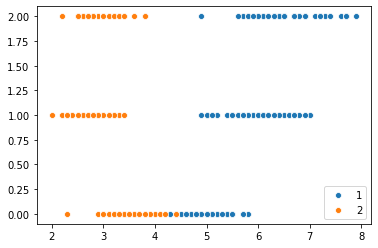

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

X,y = load_iris(return_X_y=True)
X1 = X[:,0]
X2 = X[:,1]
X3 = X[:,2]
X4 = X[:,3]


sns.scatterplot(X1,y,label = '1')
sns.scatterplot(X2,y,label = '2')

X_train, X_test, y_train, y_test = train_test_split(X[:,0:2],y,test_size=0.33, random_state=42)
#print(X_train)
logit_clf = LogisticRegression()
logit_clf.fit(X_train, y_train)
pred_logit = logit_clf.predict(X_test)
logit_score = accuracy_score(pred_logit,y_test)
print('logit:',logit_score)

clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)
pred_tree = clf.predict(X_test)
tree_score = accuracy_score(pred_tree,y_test)
print('tree:',tree_score)

## -----------------------------------------------------------------------------------------------

Раньше я не использовал train_test_split для решения задачи о выживании на титанике.
Просто выгружал результирующие данные на Kaggle и смотрел на то, что получилось.
Сейчас все дб быстрее

In [156]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


data_train = pd.read_csv('/Users/ilyanovikov/Desktop/titanic/train.csv')

data_1 = data_train.drop(['Name','Ticket','PassengerId'],axis = 1) # выкинул имя,номер билета и id пассажира, 
#в них не может содержаться закономерность, иначе мистика
data_1.isna().sum() # проверил, где есть пропущенные значения, больше всего их в колонке Cabin
data_2 = data_1.drop('Cabin',axis = 1) #выбросил колонку Cabin
data_3 = pd.get_dummies(data_2) #тк библиотеки для DS не умеют работать с текстом, разбил номинативные
#переменные на dummy_values
data_4 = data_3.fillna(data_3.Age.median())# заполнил пропуски в колонке Age медианным значением
data_4.isna().sum()

# У нас есть явная коллинеарность между Sex_female и Sex_male, а также между Embarked
# Я бы, наверное, выкинул что-то, потестим
data_5 = data_4.drop(['Sex_male','Embarked_C'],axis = 1)

y = data_5.Survived
X = data_5.drop(['Survived'],axis = 1)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

#инициализация классификаторов
clf_logit = LogisticRegression(max_iter = 1000)
clf_knn = KNeighborsClassifier(n_neighbors = 16)
clf_tree = DecisionTreeClassifier(criterion = 'entropy')
clf_rf = RandomForestClassifier()

# обучение
clf_logit.fit(X_train,y_train)
clf_knn.fit(X_train,y_train)
clf_tree.fit(X_train, y_train)
clf_rf.fit(X_train,y_train)

# тестирование
pred_logit = clf_logit.predict(X_test)
pred_knn = clf_knn.predict(X_test)
pred_tree = clf_tree.predict(X_test)
pred_rf = clf_rf.predict(X_test)

#accuracy_score
logit_acc = accuracy_score(pred_logit, y_test)
knn_acc = accuracy_score(pred_knn, y_test)
tree_acc = accuracy_score(pred_tree, y_test)
rf_acc = accuracy_score(pred_rf, y_test)

print('logit:',logit_acc)
print('knn:', knn_acc)
print('tree:', tree_acc)
print('rf:',rf_acc)

logit: 0.7593220338983051
knn: 0.6610169491525424
tree: 0.7728813559322034
rf: 0.7830508474576271


Попробуем чуть-чуть пооптимизировать гиперпараметры:
$
logit - ничего \\
knn - число \: соседей \\
tree - глубина, min\_samples\_split \: и \: \_leaf \\
rf - n\_estimators$

Text(0.5, 0, 'Число соседей')

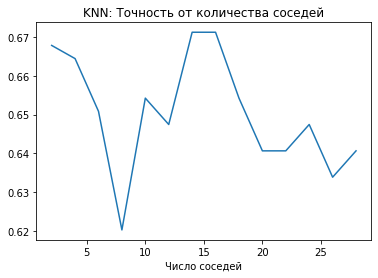

In [10]:
acc_score =[]
it = []
for k in range(2,30,2):
    it.append(k)
    clf_knn = KNeighborsClassifier(n_neighbors = k)
    clf_knn.fit(X_train,y_train)
    pred_knn = clf_knn.predict(X_test)
    acc_score.append(accuracy_score(pred_knn,y_test))

import matplotlib.pyplot as plt
plt.plot(it,acc_score)
plt.title('KNN: Точность от количества соседей')
plt.xlabel('Число соседей')


In [11]:
from sklearn.model_selection import GridSearchCV
clf_knn_new = KNeighborsClassifier()
params_knn = {'n_neighbors':range(2,30,2)}

knn_param = GridSearchCV(clf_knn_new,params_knn,cv = 5)
knn_param.fit(X_train,y_train)
knn_param.best_params_
opt_clf_knn = knn_param.best_estimator_
opt_clf_knn

KNeighborsClassifier(n_neighbors=10)

In [15]:
from sklearn.model_selection import GridSearchCV
clf_tree_new = DecisionTreeClassifier(criterion = 'entropy')
params = {'max_depth':range(2,50,2),'min_samples_split':range(2,20,2),'min_samples_leaf':range(1,10,2)}

opt_tree_par = GridSearchCV(clf_tree_new,params,cv = 5)
opt_tree_par.fit(X_train,y_train)
opt_tree_par.best_params_
opt_clf_tree = opt_tree_par.best_estimator_
opt_clf_tree

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=16)

In [16]:
from sklearn.model_selection import GridSearchCV
clf_rf_new = RandomForestClassifier(max_depth=60, min_samples_leaf=3, min_samples_split=7)
params = {'n_estimators':range(1,100,5)}

opt_rf_par = GridSearchCV(clf_rf_new,params, cv = 5)
opt_rf_par.fit(X_train,y_train)
opt_rf_par.best_params_
opt_clf_rf = opt_rf_par.best_estimator_
opt_clf_rf

RandomForestClassifier(max_depth=60, min_samples_leaf=3, min_samples_split=7,
                       n_estimators=36)

Я более-менее оптимизировал все, сейчас буду тестить. Только единственное, в случае Random Forest оптимизированное решение совершенно неустойчивое. То есть постоянно выдается разное число деревьев. Мб там точность более-менее близкая. Надо будет нарисовать потом

Ну что - оптимизированные классификаторы есть, go тестить!

In [19]:
# тестирование
pred_logit = clf_logit.predict(X_test)
pred_knn = opt_clf_knn.predict(X_test)
pred_tree = opt_clf_tree.predict(X_test)
pred_rf = opt_clf_rf.predict(X_test)

#accuracy_score
logit_acc = accuracy_score(pred_logit, y_test)
knn_acc = accuracy_score(pred_knn, y_test)
tree_acc = accuracy_score(pred_tree, y_test)
rf_acc = accuracy_score(pred_rf, y_test)

print('logit:',logit_acc)
print('knn:', knn_acc)
print('tree:', tree_acc)
print('rf:',rf_acc)

logit: 0.7932203389830509
knn: 0.6542372881355932
tree: 0.823728813559322
rf: 0.8271186440677966


Ха-ха, прикольно, оптимизированный rf смог дотянуться до logit. Пока они самые точные =)

Чуть-чуть увеличилась точность у DecisionTree.

-----

Ниже я мучаюсь и пытаюсь добавить титулы

И я смог!

Пытаюсь разобраться с тем, как устроены титулы

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


data_train = pd.read_csv('/Users/ilyanovikov/Desktop/titanic/train.csv')


Name = data_train['Name']
Name_surname_split = Name.str.split(', ')
Surname = Name_surname_split.str[0]
Names = Name_surname_split.str[1]
title = Names.str.split('. ').str[0]

check = title.value_counts().to_frame().reset_index().rename(columns = {'index':'title','Name':'count'})

surv_title = check[(check.title != 'Mr') & (check.title != 'Miss') & (check.title != 'Mrs') & (check.title != 'Ms')]
surv_title_list = surv_title['title'].to_list()
surv_title_list
#Name_surname.str[1].str.split('. ')

['Master',
 'Dr',
 'Rev',
 'Mlle',
 'Major',
 'Col',
 'th',
 'Capt',
 'Sir',
 'Lady',
 'Mme',
 'Don',
 'Jonkheer']

In [2]:


# наконец-то я добавил колонку с титулами в исходные данные
data_train['Title'] = 0
for a in surv_title_list:        
    for i in range (0, len(data_train)):
        if data_train.loc[i,:].Name.split(', ')[1].split('. ')[0] == a:
            data_train.Title[i] = 1

        
# сделаем ту же самую предобработку, что и в самый первый раз
n_data_1 = data_train.drop(['Name','Ticket','PassengerId','Cabin','Embarked'],axis = 1) # первые три переменные исходя из
#здравого смысла, Cabin - потому что там больше всего пропущено значений
n_data_2 = pd.get_dummies(n_data_1).drop(['Sex_male'], axis = 1) # первые две фичи из-за мультиколлинеарности
n_data_3 = n_data_2.fillna(n_data_2.Age.median())
n_data_3['Family'] = n_data_3['Parch']+n_data_3['SibSp']
n_data_4 = n_data_3.drop(['SibSp','Parch'], axis = 1)

y = n_data_4.Survived
X = n_data_4.drop(['Survived'], axis = 1)


X.head(20)

# Все X,y данные готовы, предобработка завершена

/var/folders/sd/c8nwk4616hn2czh04yrmmqbh0000gn/T/ipykernel_99861/2675473866.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.Title[i] = 1


,Pclass,Age,Fare,Title,Sex_female,Family
0,3,22.0,7.2500,0,0,1
1,1,38.0,71.2833,0,1,1
2,3,26.0,7.9250,0,1,0
3,1,35.0,53.1000,0,1,1
4,3,35.0,8.0500,0,0,0
5,3,28.0,8.4583,0,0,0
6,1,54.0,51.8625,0,0,0
7,3,2.0,21.0750,1,0,4
8,3,27.0,11.1333,0,1,2
9,2,14.0,30.0708,0,1,1


Переходим к анализу данных. Оптимизирую модели на новых данных

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

#инициализация и оптимизация классификаторов

#logit
clf_logit = LogisticRegression()
clf_logit.fit(X_train,y_train)


# KNN
clf_knn_new = KNeighborsClassifier()
params_knn = {'n_neighbors':range(2,30,2)}

knn_param = GridSearchCV(clf_knn_new,params_knn,cv = 5)
knn_param.fit(X_train,y_train)
knn_param.best_params_
opt_clf_knn = knn_param.best_estimator_
opt_clf_knn

#Tree
clf_tree_new_ = DecisionTreeClassifier(criterion = 'entropy')
params = {'max_depth':range(2,50,1),'min_samples_split':range(2,20,2)}

opt_tree_par = GridSearchCV(clf_tree_new_,params,cv = 5)
opt_tree_par.fit(X_train,y_train)
opt_tree_par.best_params_
opt_clf_tree = opt_tree_par.best_estimator_
opt_clf_tree

#RF
clf_rf_new = RandomForestClassifier(max_depth = 50, min_samples_split=16)
params = {'n_estimators':range(5,100,5)}

opt_rf_par = GridSearchCV(clf_rf_new,params, cv = 5)
opt_rf_par.fit(X_train,y_train)
opt_rf_par.best_params_
opt_clf_rf = opt_rf_par.best_estimator_
opt_clf_rf


# тестирование
pred_logit = clf_logit.predict(X_test)
pred_knn = opt_clf_knn.predict(X_test)
pred_tree = opt_clf_tree.predict(X_test)
pred_rf = opt_clf_rf.predict(X_test)

#accuracy_score
logit_acc = accuracy_score(pred_logit, y_test)
knn_acc = accuracy_score(pred_knn, y_test)
tree_acc = accuracy_score(pred_tree, y_test)
rf_acc = accuracy_score(pred_rf, y_test)

print('logit:',logit_acc)
print('knn:', knn_acc)
print('tree:', tree_acc)
print('rf:',rf_acc)
print(X_train.head(5))

logit: 0.7611940298507462
knn: 0.6977611940298507
tree: 0.7761194029850746
rf: 0.7835820895522388
     Pclass   Age     Fare  Title  Sex_female  Family
166       1  28.0  55.0000      0           1       1
688       3  18.0   7.7958      0           0       0
100       3  28.0   7.8958      0           1       0
210       3  24.0   7.0500      0           0       0
190       2  32.0  13.0000      0           1       0


<AxesSubplot:ylabel='features'>

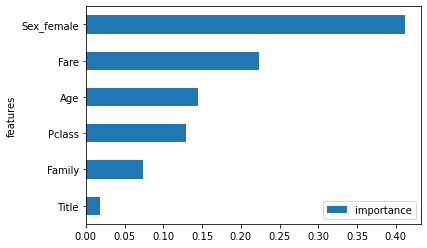

In [8]:
f_imp = opt_clf_rf.feature_importances_
feature_importances = pd.DataFrame({'features':list(X_train), 'importance':f_imp}).set_index('features')
feature_importances.sort_values('importance').plot(kind = 'barh')


In [36]:
opt_clf_tree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

--------

In [98]:
X_train.head()

,Pclass,Age,Fare,Title,Sex_female,Embarked_Q,Embarked_S,Family
492,1,55.0,30.5000,0,0,0,1,0
382,3,32.0,7.9250,0,0,0,1,0
176,3,28.0,25.4667,1,0,0,1,4
26,3,28.0,7.2250,0,0,0,0,0
765,1,51.0,77.9583,0,1,0,1,1


In [652]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [658]:
data_train.drop(['Age','Fare','Cabin'],axis = 1).nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
SibSp            7
Parch            7
Ticket         681
Embarked         3
Title            2
dtype: int64

In [663]:
data_train.shape

(891, 13)

In [664]:
data_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

-------------

Здесь была предобработка: 
1. Добавил титулы 
2. Выбросил Name, Ticket, PassengerId, Cabin 
3. Cделал get_dummies (one-hot encoding) и убрал коллинеарные переменные (Sex_male, Embarked_C, Embarked_Q, Embarked_S)
4. Заполнил NA-значения в колонке Age медианным
5. Добавил колонку Family = Parch + SibSp, убрал отдельные колонки Parch и SibSp

In [11]:
from catboost import CatBoostClassifier
categories_indices = list([0,3,4,5])
#categories_indices = list([0,3,4])

boost_clf = CatBoostClassifier(iterations= 1000,random_seed=10, max_depth = 5)
boost_clf.fit(X_train,y_train, eval_set = (X_test,y_test), cat_features=categories_indices, verbose = 50, plot = True)
pred_boost = boost_clf.predict(X_test)


boost_acc = accuracy_score(pred_boost, y_test)
print(boost_acc)



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.028193
0:	learn: 0.6756524	test: 0.6777677	best: 0.6777677 (0)	total: 1.61ms	remaining: 1.6s
50:	learn: 0.3893106	test: 0.4756832	best: 0.4756832 (50)	total: 59.3ms	remaining: 1.1s
100:	learn: 0.3505333	test: 0.4616651	best: 0.4615276 (91)	total: 118ms	remaining: 1.05s
150:	learn: 0.3322154	test: 0.4607139	best: 0.4598096 (132)	total: 174ms	remaining: 978ms
200:	learn: 0.3176271	test: 0.4622456	best: 0.4598096 (132)	total: 241ms	remaining: 957ms
250:	learn: 0.3066459	test: 0.4641601	best: 0.4598096 (132)	total: 303ms	remaining: 903ms
300:	learn: 0.2954502	test: 0.4640743	best: 0.4598096 (132)	total: 357ms	remaining: 829ms
350:	learn: 0.2761015	test: 0.4656565	best: 0.4598096 (132)	total: 411ms	remaining: 760ms
400:	learn: 0.2586961	test: 0.4695793	best: 0.4598096 (132)	total: 470ms	remaining: 702ms
450:	learn: 0.2445216	test: 0.4702638	best: 0.4598096 (132)	total: 522ms	remaining: 635ms
500:	learn: 0.2310959	test: 0.4725888	best: 0.4598096 (132)	total: 576ms	rema

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 857 to 684
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      623 non-null    int64  
 1   Age         623 non-null    float64
 2   Fare        623 non-null    float64
 3   Title       623 non-null    int64  
 4   Sex_female  623 non-null    uint8  
 5   Family      623 non-null    int64  
dtypes: float64(2), int64(3), uint8(1)
memory usage: 29.8 KB


------

А вот тут другая предобработка. Тк Catboost сам разбирается с категориальными переменными (one-hot encoding не нужен), то я не делал get_dummies. Тем нее менее мне:

- пришлось перевести данные типа object в string 
- заполнить пропущенные значения

In [66]:
Name = data_train['Name']
Name_surname_split = Name.str.split(', ')
Surname = Name_surname_split.str[0]
Names = Name_surname_split.str[1]
title = Names.str.split('. ').str[0]

check = title.value_counts().to_frame().reset_index().rename(columns = {'index':'title','Name':'count'})

surv_title = check[(check.title != 'Mr') & (check.title != 'Miss') & (check.title != 'Mrs') & (check.title != 'Ms')]
surv_title_list = surv_title['title'].to_list()


data_train['Title'] = 0
for a in surv_title_list:        
    for i in range (0, len(data_train)):
        if data_train.loc[i,:].Name.split(', ')[1].split('. ')[0] == a:
            data_train.Title[i] = 1


t_data_1 = data_train.drop(['Name','Ticket','PassengerId','Cabin','Embarked'],axis = 1) 
t_data_1['Family'] = t_data_1['Parch']+t_data_1['SibSp']
t_data_2 = t_data_1.drop(['SibSp','Parch'], axis = 1)
t_data_2['Sex'] = t_data_2['Sex'].astype('string')
#t_data_2['Embarked'] = t_data_2['Embarked'].astype('string')
t_data_2['Age'] = t_data_2['Age'].fillna(t_data_2.Age.median())
#t_data_2['Embarked'] = t_data_2['Embarked'].fillna('S')


yt = t_data_2.Survived
Xt = t_data_2.drop(['Survived'], axis = 1)

Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt,yt, test_size=0.3, random_state=41)

print(Xt_train.head(5))

# CatBoost сам разбирается с категориальными переменными (это его фишка), то есть one-hot encoding не нужен
# Хотя я и задолбался переводить все в строки и заполнять NA-значения
cat_feat_indices = list([0,1,4])
test_boost_clf = CatBoostClassifier()
test_boost_clf.fit(Xt_train,yt_train, eval_set =(Xt_test,yt_test), cat_features = cat_feat_indices, verbose = 50)
self_boost_pred = test_boost_clf.predict(Xt_test)
self_boost_acc = accuracy_score(self_boost_pred,yt_test)
print(self_boost_acc)


/var/folders/sd/c8nwk4616hn2czh04yrmmqbh0000gn/T/ipykernel_99006/136464711.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.Title[i] = 1


     Pclass   Sex   Age     Fare  Title  Family
464       3  male  28.0   8.0500      0       0
451       3  male  28.0  19.9667      0       1
62        1  male  45.0  83.4750      0       1
705       2  male  39.0  26.0000      0       0
712       1  male  48.0  52.0000      0       1
Learning rate set to 0.028193
0:	learn: 0.6761786	test: 0.6752033	best: 0.6752033 (0)	total: 2.44ms	remaining: 2.44s
50:	learn: 0.4075608	test: 0.4086326	best: 0.4085448 (49)	total: 55.9ms	remaining: 1.04s
100:	learn: 0.3716336	test: 0.3919749	best: 0.3918115 (99)	total: 106ms	remaining: 940ms
150:	learn: 0.3517454	test: 0.3885616	best: 0.3884514 (148)	total: 158ms	remaining: 888ms
200:	learn: 0.3354514	test: 0.3881787	best: 0.3876744 (194)	total: 219ms	remaining: 871ms
250:	learn: 0.3224743	test: 0.3880299	best: 0.3876744 (194)	total: 279ms	remaining: 833ms
300:	learn: 0.3012075	test: 0.3878115	best: 0.3876166 (298)	total: 335ms	remaining: 779ms
350:	learn: 0.2856300	test: 0.3884125	best: 0.3866995 (31

А тут я делал Grid_search, но он оказался бесполезен. Модель просто минимизирует функцию потерь на обучающей выборке. Это ерунда, нужна хоть какая-нибудь валидация. Хотя вроде пишут, что она есть.

In [2]:
# from catboost import CatBoostClassifier, Pool

# search_boost_clf = CatBoostClassifier()
# cat_feat_indices = list([0,1,2,5,6,7]) # обязательно ему указывать, что является категориальными переменными
# pool_train = Pool(t_data_2, label = t_data_2.Survived, cat_features=cat_feat_indices)

# params ={'max_depth':range(2,11,2),'iterations':range(1,501,50),'learning_rate':[0.01,0.03,0.05,0.07]}
# search_boost_clf.grid_search(params, pool_train,verbose = False, plot = True)

In [30]:
import ipywidgets
ipywidgets.__version__

'8.0.2'

Надо сформировать файл с предсказаниями

In [19]:
data_to_test = pd.read_csv('/Users/ilyanovikov/Desktop/titanic/test.csv')

# предобработка similar to та, что делали с train-данными
data_to_test['Title'] = 0
for a in surv_title_list:        
    for i in range (0, len(data_to_test)):
        if data_to_test.loc[i,:].Name.split(', ')[1].split('. ')[0] == a:
            data_to_test.Title[i] = 1

data_to_test['Family'] = data_to_test['Parch']+ data_to_test['SibSp']
data_to_test['Age'] = data_to_test['Age'].fillna(data_to_test.Age.median())
data_to_test['Fare'] = data_to_test['Fare'].fillna(data_to_test.Fare.median())
data_to_test_2 = data_to_test.drop(['PassengerId','Name','Ticket','Cabin','Embarked','Parch','SibSp'], axis = 1)
data_to_test_3 = pd.get_dummies(data_to_test_2).drop(['Sex_male'], axis = 1) # почему-то даже с one-hot encoding бустинг себя лучше показывает
data_to_test_4 = data_to_test_3[['Pclass','Age','Fare','Title','Sex_female','Family']]
X_to_test = data_to_test_4
#предобработка завершена

#lets go...

pred_o_logit = clf_logit.predict(X_to_test)
pred_opt_tree = opt_clf_tree.predict(X_to_test)
pred_opt_rf = opt_clf_rf.predict(X_to_test)
pred_boost = boost_clf.predict(X_to_test)

#pred_test_boost = test_boost_clf.predict(X_to_test)


opt_logit_pred_df = pd.DataFrame({'PassengerId':data_to_test.PassengerId,'Survived':pred_o_logit}).set_index('PassengerId')
opt_logit_pred_df.to_csv('/Users/ilyanovikov/Desktop/Opt_logit_pred.csv')

#opt_tree_pred_df = pd.DataFrame({'PassengerId':data_to_test.PassengerId,'Survived':pred_opt_tree}).set_index('PassengerId')
#opt_tree_pred_df.to_csv('/Users/ilyanovikov/Desktop/Opt_tree_pred.csv')
#opt_rf_pred_df = pd.DataFrame({'PassengerId':data_to_test.PassengerId,'Survived':pred_opt_rf}).set_index('PassengerId')
#opt_rf_pred_df.to_csv('/Users/ilyanovikov/Desktop/Opt_rf_pred.csv')
#opt_boost_pred_df = pd.DataFrame({'PassengerId':data_to_test.PassengerId,'Survived':pred_boost}).set_index('PassengerId')
#opt_boost_pred_df.to_csv('/Users/ilyanovikov/Desktop/Opt_boost_pred.csv')



/var/folders/sd/c8nwk4616hn2czh04yrmmqbh0000gn/T/ipykernel_99006/2917510366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_test.Title[i] = 1


In [83]:
print(boost_clf.get_params())
print(opt_clf_rf.get_params())

{'iterations': 1000, 'random_seed': 10, 'max_depth': 5}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Просто ради интереса сделаю неоптимизированный LightGBM

In [22]:

import lightgbm as lgb
light_clf = lgb.LGBMClassifier()
light_clf.fit(X_train, y_train)

light_pred = light_clf.predict(X_test)
light_acc = accuracy_score(light_pred,y_test)

light_boost = light_clf.predict(X_to_test)

opt_light_pred_df = pd.DataFrame({'PassengerId':data_to_test.PassengerId,'Survived':light_boost}).set_index('PassengerId')
opt_light_pred_df.to_csv('/Users/ilyanovikov/Desktop/Opt_light_pred.csv')

Проверил, что в итоговый файл все нормально записывается

In [37]:
a = 
check_file = pd.read_csv('/Users/ilyanovikov/Desktop/Opt_light_pred.csv')
check_file.shape
print(check_file.head(10))
light_boost


SyntaxError: invalid syntax (1340586862.py, line 1)

In [67]:
data_to_test_CB = pd.read_csv('/Users/ilyanovikov/Desktop/titanic/test.csv')


data_to_test_CB['Title'] = 0
for a in surv_title_list:        
    for i in range (0, len(data_to_test_CB)):
        if data_to_test_CB.loc[i,:].Name.split(', ')[1].split('. ')[0] == a:
            data_to_test_CB.Title[i] = 1


CB_data_1 = data_to_test_CB.drop(['Name','Ticket','PassengerId','Cabin','Embarked'],axis = 1) 
CB_data_1['Family'] = CB_data_1['Parch']+CB_data_1['SibSp']
CB_data_2 = CB_data_1.drop(['SibSp','Parch'], axis = 1)
CB_data_2['Sex'] = CB_data_2['Sex'].astype('string')
CB_data_2['Age'] = CB_data_2['Age'].fillna(CB_data_2.Age.median())

Xcb = CB_data_2

test_CB_pred = test_boost_clf.predict(Xcb)

opt_testCB_pred_df = pd.DataFrame({'PassengerId':data_to_test.PassengerId,'Survived':test_CB_pred}).set_index('PassengerId')
opt_testCB_pred_df.to_csv('/Users/ilyanovikov/Desktop/Opt_testCB_pred.csv')

control = pd.read_csv('/Users/ilyanovikov/Desktop/Opt_testCB_pred.csv')
print(control.shape)
print(control.head(5))


/var/folders/sd/c8nwk4616hn2czh04yrmmqbh0000gn/T/ipykernel_99006/685709904.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_test_CB.Title[i] = 1


(418, 2)
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [22]:
data_train[data_train.Survived == 1].groupby(['Fare']).Survived.count()

Fare
0.0000      1
6.9750      1
7.1417      1
7.2250      3
7.2292      4
           ..
227.5250    3
247.5208    1
262.3750    2
263.0000    2
512.3292    3
Name: Survived, Length: 153, dtype: int64

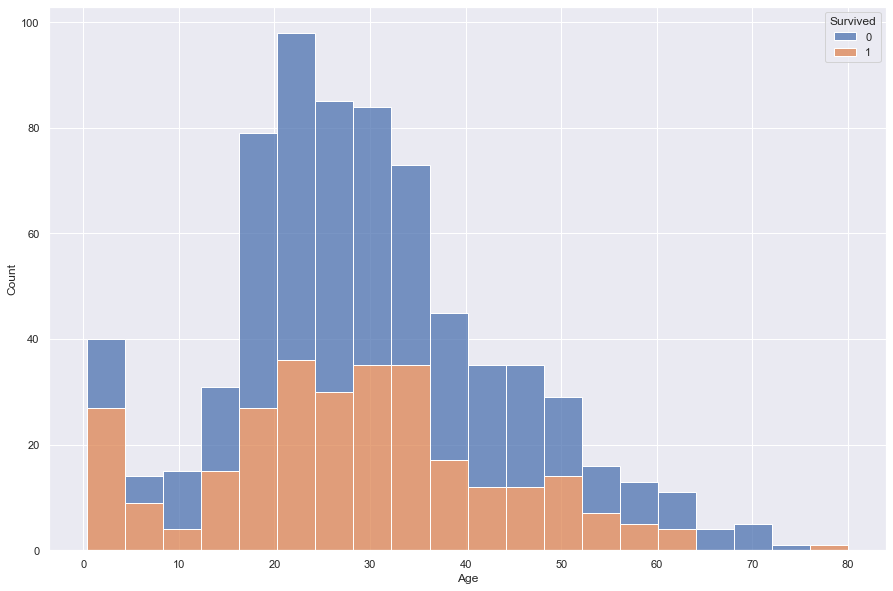

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data = data_train , x=data_train['Age'] , hue=data_train['Survived'],multiple='stack')
#plt.xlim([0,100])
#plt.ylim([0,300])
sns.set(rc={'figure.figsize':(15,10)})

In [5]:
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Попробовать Catboost еще раз, более аккуратно внести категориальные переменные

**Идеи:**

1. Сделать группы по возрастам, условно, 6 групп. Лучше еще раз построить гистограмму по возраста, но отнормировать. Или даже kdf. После чего сделать разбиение по группам. 
2. Сделать группы по количеству ближайших родственников
3. Мне кажется, что я использовал Catboost не по максимуму